## We need to findout which passenger have survived the titanic crash

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pandas_profiling
import autoviz

## LOADING DATA

In [2]:
df = pd.read_csv('train.csv') # training data set
df.head(12)  # Sibsp - Number of Siblings/Spouses Aboard. Parch - Number of Parents/Children Aboard

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## ANALYZE

In [3]:
df.info() #here age and cabin have null values, so we need to see how to manage that by either dropping the columns or substitutingthe nan values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#report = pandas_profiling.ProfileReport(df) # to understand intial data and to reduce further work in eda
#report

In [5]:
#sns.pairplot(df) # to understand initial data

In [6]:
corr = df.corr() #for finding correlation
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
df.describe() #to understand the data better

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


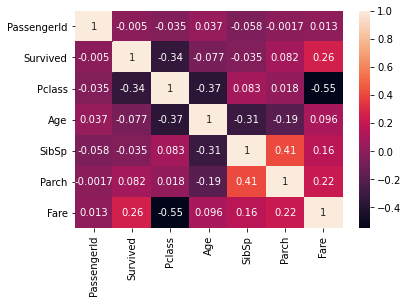

In [8]:
sns.heatmap(corr,annot=True) # for easier understanding

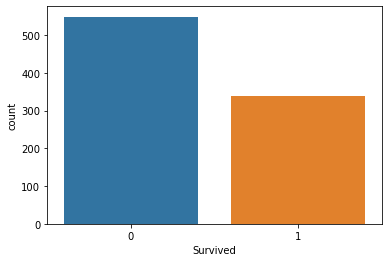

In [58]:
sns.countplot("Survived", data = df)

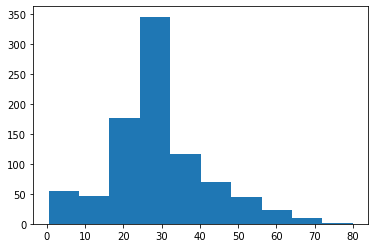

In [61]:
plt.hist(df.Age)
plt.show()

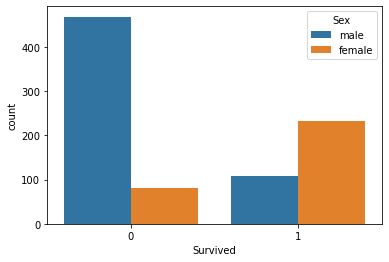

In [11]:
sns.countplot("Survived",hue = "Sex", data = df)# female survived 3.5 times more than men

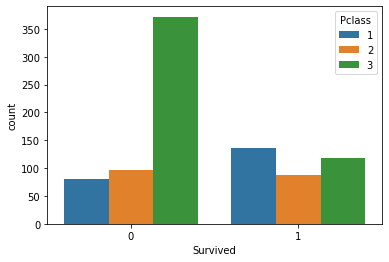

In [12]:
sns.countplot("Survived",hue = "Pclass", data = df) # cheapest priced class survived less

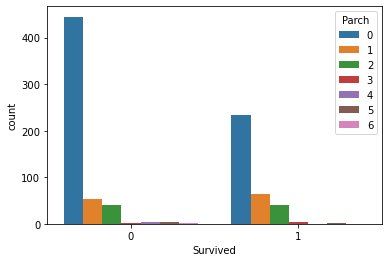

In [13]:
sns.countplot("Survived",hue = "Parch", data = df)

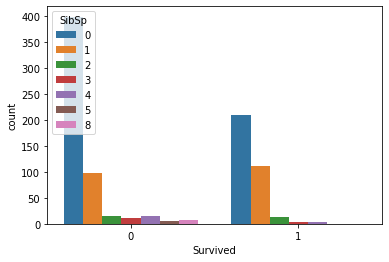

In [14]:
sns.countplot("Survived",hue = "SibSp", data = df)

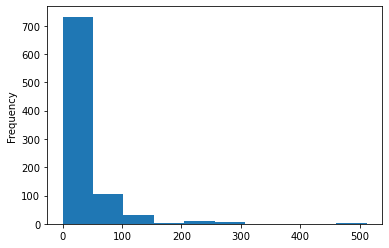

In [15]:
df["Fare"].plot.hist()

## DATA CLEANING & WRANGLING

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

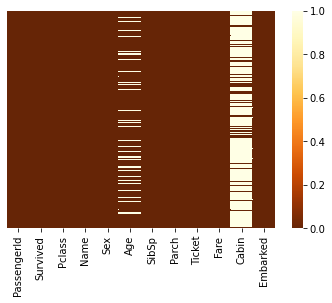

In [17]:
#sns.heatmap(df.isnull(), yticklabels= False, cmap='YlOrBr_r') # to see visualization

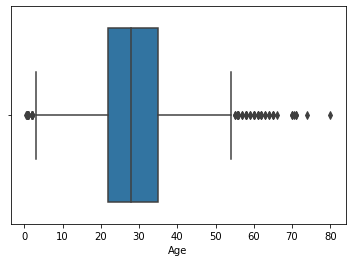

In [60]:
sns.boxplot(df.Age)

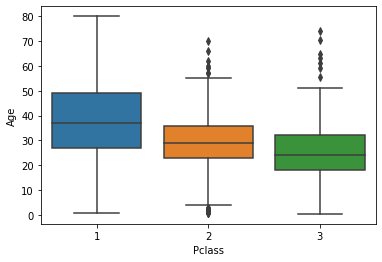

In [18]:
sns.boxplot(x = 'Pclass', y = 'Age', data= df) # whiskers are median (+ or -) 1.5*IQR and outliers are points which doesn't fall under 1.5*IQR

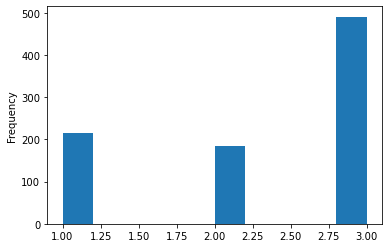

In [19]:
df["Pclass"].plot.hist()

In [20]:
# Imputation - substituting or removing the NAN value columns
df.drop("Cabin",axis = 1,inplace= True) # Axis 0 represents rows, axis 1 represents columns and when inplace is True then df will permanently drop that column

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
df['Age'] = df['Age'].fillna(df.Age.median())

In [23]:
df.dropna(subset=['Embarked'], inplace = True) # dropping the nan value columns, if we want the nan values then we can replace with mean or median based on variance or outliers

In [24]:
df.isnull().sum() # check if there are any nan values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


(array([ 54.,  46., 177., 346., 117.,  70.,  45.,  23.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

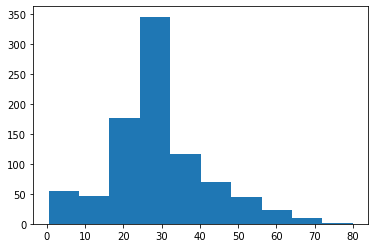

In [26]:
plt.hist(df.Age) # we can see the difference in histograms as we add mean value inplace of nan

In [27]:
#df['norm_Fare'] = np.log(df.Fare+1) #we can normalize the fare data if we like 

In [28]:
sex = pd.get_dummies(df['Sex'],drop_first = True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [29]:
Pcl = pd.get_dummies(df['Pclass'],drop_first = True )
Pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [30]:
df = pd.concat([df,sex,Pcl],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [31]:
df.drop(['PassengerId','Name','Ticket','Sex','Embarked','Pclass'],axis = 1, inplace = True)

In [32]:
df.head()

,Survived,Age,SibSp,Parch,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


# Train Data

In [33]:
x = df.drop("Survived",axis = 1)          # Independent variables
y = df['Survived']                        #for predicting dependent variable

In [62]:
from sklearn.model_selection import train_test_split # if both train and test data sets are in same file we can change by using this
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.8) #0.8 means 80% data for train and 50% for test

In [63]:
from sklearn.linear_model import LogisticRegression

In [36]:
logmodel = LogisticRegression(max_iter=1000)

In [37]:
logmodel.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [38]:
prediction = logmodel.predict(X_test)

In [39]:
from sklearn.metrics import classification_report #for knowing the precision or we can use confusion matrix

In [40]:
classification_report(Y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.85      0.84      0.85       294\n           1       0.70      0.71      0.70       151\n\n    accuracy                           0.80       445\n   macro avg       0.77      0.78      0.78       445\nweighted avg       0.80      0.80      0.80       445\n'

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(Y_test,prediction)

array([[248,  46],
       [ 44, 107]], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,prediction)          #to know the accuracy 

0.797752808988764

In [44]:
#test = pd.read_csv('test.csv')
#test.head()

In [45]:
#test.drop("Cabin",axis = 1,inplace= True) 

In [46]:
#test['Age'] = test['Age'].fillna(test.Age.median())

In [47]:
#test['Fare'] = test['Fare'].fillna(test.Age.median())

In [48]:
#sex1 = pd.get_dummies(test['Sex'],drop_first = True)
#sex1.head()

In [49]:
#id = test['PassengerId']
#id.head()

In [50]:
#Pcl1 = pd.get_dummies(test['Pclass'],drop_first = True )
#Pcl1.head()

In [51]:
#test = pd.concat([test,sex1,Pcl1],axis=1)
#test.head()

In [52]:
#test.drop(['PassengerId','Name','Ticket','Sex','Embarked','Pclass'],axis = 1, inplace = True)

In [53]:
#test.isnull().sum()        # check if there are any nan values

In [54]:
#test.head()

In [55]:
#predictions = logmodel.predict(test)        

In [56]:
#submission = pd.DataFrame({'PassengerId':id,'Survived':predictions})  
#submission.head()                                                     

In [57]:
# convert to csv file

#filename = 'Titanic Predictions 1.csv'

#submission.to_csv(filename,index=False) 